# 3. data preprocessing

In [1]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt

%run ./scripts/corr_to_html.py

In [2]:
df = pd.read_pickle("./pickles/002.dataframe.data-analytics.pkl")

## 3.1. categorical features

### 3.1.1. Amenities

#### 3.1.1.1. one-hot
The amenities are stored as a *list* in the data frame.
Because this is a *list* of categorical features, I will store them in a one-hot numeric array

In [3]:
df["amenities"]

0         [Heating, Kitchen, Washer, Wifi, Long term sta...
1         [Shampoo, Heating, Kitchen, Essentials, Washer...
2         [Heating, TV, Kitchen, Washer, Wifi, Long term...
3         [Heating, TV, Kitchen, Wifi, Long term stays a...
4         [Heating, TV, Kitchen, Essentials, Hair dryer,...
                                ...                        
279707    [Iron, Heating, Washer, Dedicated workspace, E...
279708    [Shampoo, Iron, Heating, Washer, Hair dryer, E...
279709    [Paid parking off premises, Shampoo, First aid...
279710    [TV, Iron, Kitchen, Hangers, Smoke alarm, Cabl...
279711    [Shower gel, Shampoo, Iron, Heating, Washer, D...
Name: amenities, Length: 279599, dtype: object

In [4]:
df["amenities"][0]

['Heating', 'Kitchen', 'Washer', 'Wifi', 'Long term stays allowed']

In [5]:
type(df["amenities"][0])

list

In [6]:
df["amenities"][0][0]

'Heating'

In [7]:
mlb = MultiLabelBinarizer()
df_amenities = pd.DataFrame(mlb.fit_transform(df["amenities"]))

In [8]:
df_amenities

,0,1,2,3,4,5,6,7,8,9,...,3260,3261,3262,3263,3264,3265,3266,3267,3268,3269
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Storing the different types of amenities in [amenities.csv](analytics/amenities.csv)

In [9]:
pd.Series(mlb.classes_).to_csv("analytics/amenities.csv")
mlb.classes_.size

3270

#### 3.1.1.2. Reducing #amenities

In [10]:
s_amenities_sum = df_amenities.sum()
s_amenities_sum

0       2
1       2
2       2
3       1
4       1
       ..
3265    1
3266    1
3267    1
3268    1
3269    1
Length: 3270, dtype: int64

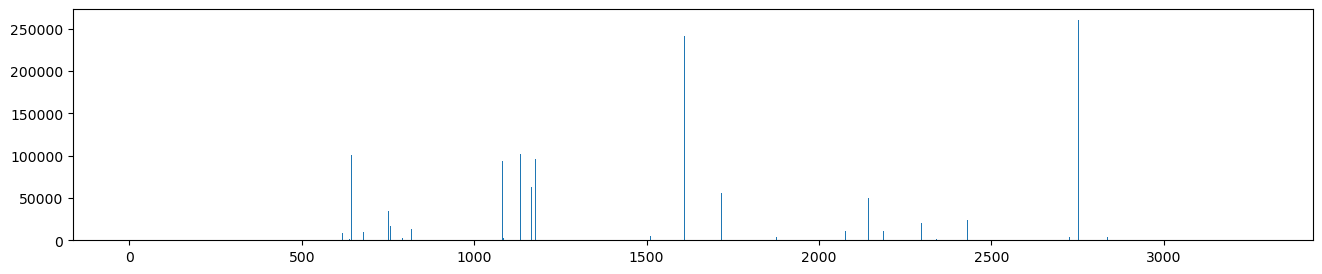

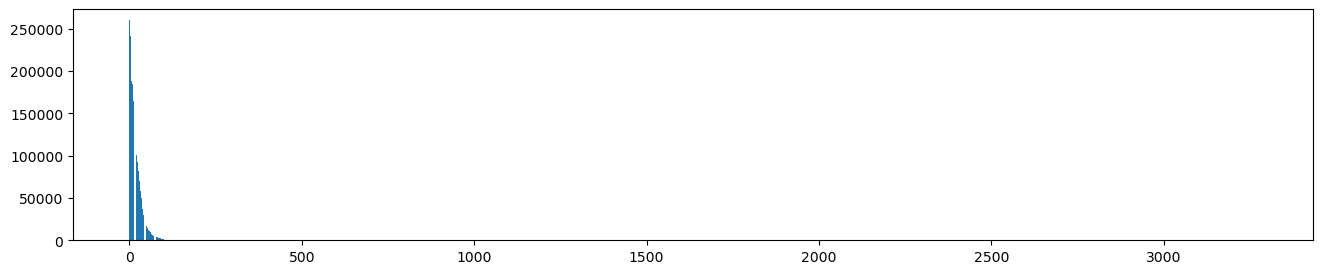

In [11]:
plt.figure(figsize=(16, 3))
plt.bar(s_amenities_sum.index, s_amenities_sum)
plt.show()

plt.figure(figsize=(16, 3))
plt.bar(np.array(range(0, s_amenities_sum.size)), s_amenities_sum.sort_values(ascending=False))
plt.show()

Looking at the graphs above, we can see that there are far too many different amenities. Many of them are only used a few times.

This is partly due to errors in the dataset, see the example below:

In [12]:
print(mlb.classes_[0])
print()
print(mlb.classes_[1])

 Amenities Realgem’s -Talentos do Brasil Feita a base de mel, a linha respeita a natureza e promove o turismo sustentável, pois tem formulação biodegradável, frascos recicláveis e extratos adquiridos de pequenos agricultores brasileiros. Além dos extratos da agricultura familiar, que valorizam e geram renda para os agricultores, 5% do valor das vendas dos cosméticos é destinado à Cooperativa fabricante da matéria-prima Outro diferencial é que estes cosméticos são os únicos do mercado hoteleiro altamente sustentáveis e homologados pelo Ministério do Turismo, Ministério do Desenvolvimento Agrário e SEBRAE.  body soap

 Amenities Realgem’s -Talentos do Brasil Feita a base de mel, a linha respeita a natureza e promove o turismo sustentável, pois tem formulação biodegradável, frascos recicláveis e extratos adquiridos de pequenos agricultores brasileiros. Além dos extratos da agricultura familiar, que valorizam e geram renda para os agricultores, 5% do valor das vendas dos cosméticos é desti

To make it easier for the model, we will only include the amenities that are used in more than $10\%$ of the datapoints.

In [13]:
int(df.shape[0] * .10)

27959

So we will only include the amenities that are used in at least $27959$ different datapoints.

In [14]:
s_amenities_to_use = (s_amenities_sum > int(df.shape[0] * .10))
s_amenities_to_use.value_counts()

False    3227
True       43
dtype: int64

This leaves us with a total of $43$ amenities

Below is the list of amenities that will/can be used in the model

In [15]:
pd.Series(mlb.classes_[s_amenities_to_use])

0               Air conditioning
1                     Bed linens
2                      Breakfast
3                       Cable TV
4          Carbon monoxide alarm
5                   Coffee maker
6                 Cooking basics
7            Dedicated workspace
8          Dishes and silverware
9                     Dishwasher
10                         Dryer
11                      Elevator
12                    Essentials
13    Extra pillows and blankets
14             Fire extinguisher
15                 First aid kit
16      Free parking on premises
17           Free street parking
18            Garden or backyard
19                           Gym
20                    Hair dryer
21                       Hangers
22                       Heating
23               Host greets you
24                     Hot water
25                          Iron
26                       Kitchen
27          Lock on bedroom door
28       Long term stays allowed
29       Luggage dropoff allowed
30        

In [16]:
df_amenities_beneficial = df_amenities.loc[:, s_amenities_to_use]
df_amenities_beneficial.columns = mlb.classes_[s_amenities_to_use]

df_amenities_beneficial

,Air conditioning,Bed linens,Breakfast,Cable TV,Carbon monoxide alarm,Coffee maker,Cooking basics,Dedicated workspace,Dishes and silverware,Dishwasher,...,Patio or balcony,Pool,Private entrance,Refrigerator,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279594,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,1
279595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
279596,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
279597,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,1,0,1,1,1


#### 3.1.1.3. Plot

<BarContainer object of 43 artists>

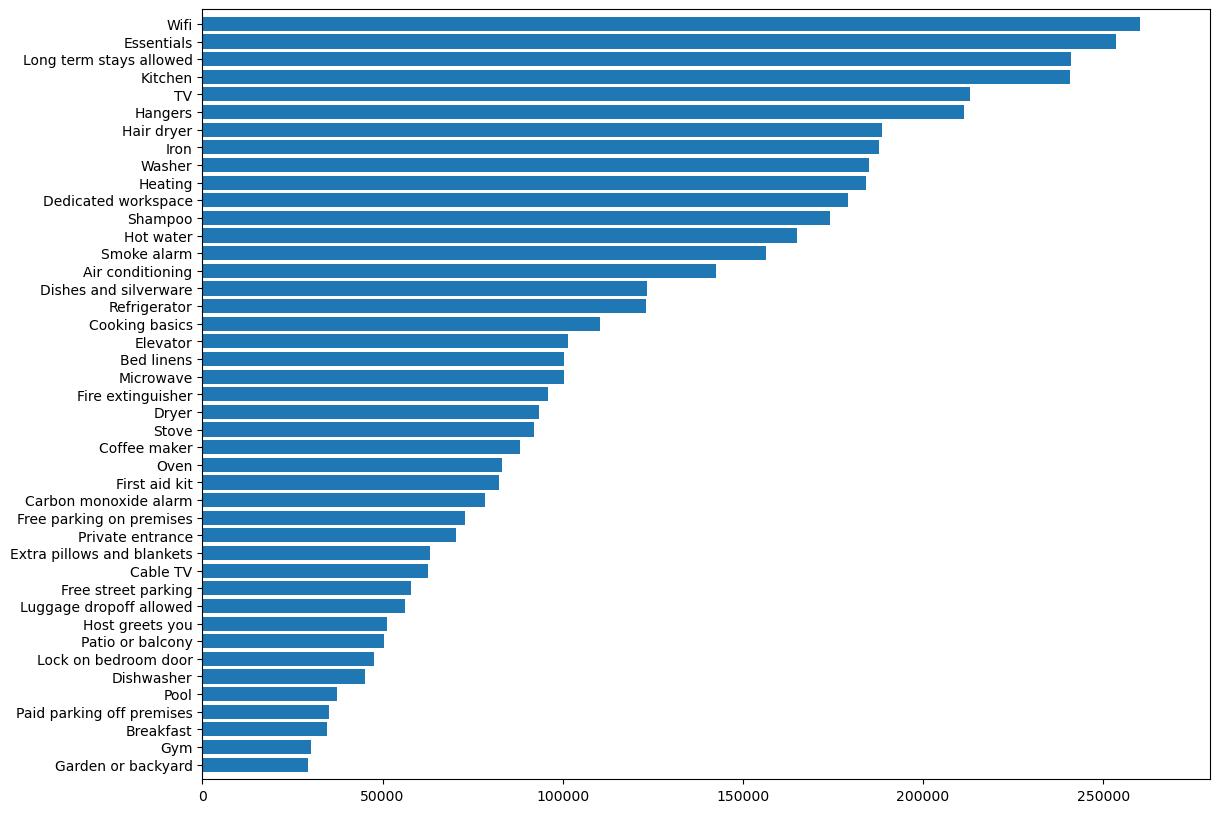

In [17]:
_temp = df_amenities_beneficial.sum().sort_values()

plt.figure(figsize=(13, 10))
plt.xlim(0, df.shape[0])  # Set max of X-axis to total number of datapoints
plt.margins(y=.01)  # Removing whitespace top and bottom
plt.barh(_temp.index, _temp.values)

Plotting `amenities` $\rightarrow$ `price`

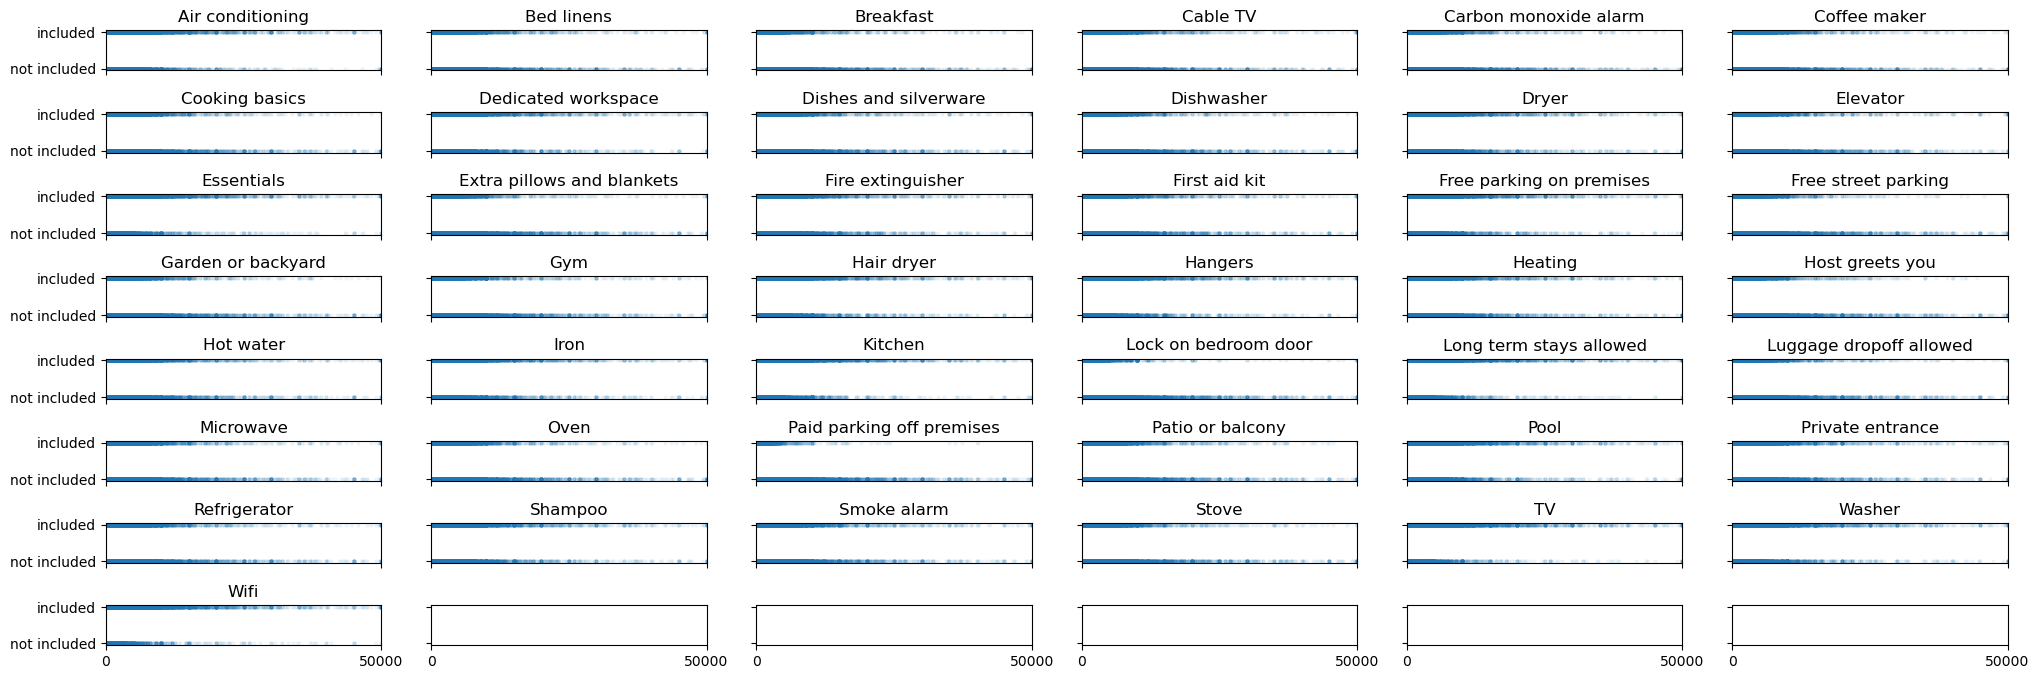

In [18]:
fig, axes = plt.subplots(
    df_amenities_beneficial.columns.size // 6 + (df_amenities_beneficial.columns.size % 6 != 0),
    6,
    sharex=True,
    sharey=True,
    figsize=(20, 7),
)

fig.tight_layout(pad=2)

# https://stackoverflow.com/a/19626667/13165967
plt.setp(
    axes,
    xticks=[0, 50_000],
    yticks=[0, 1],
    yticklabels=["not included", "included"],
    xlim=(0, 50_000),
)

for c, ax in zip(df_amenities_beneficial.columns, axes.ravel()):
    ax.scatter(df["price"], df_amenities_beneficial[c], alpha=.05, s=5)
    ax.title.set_text(c)

Correlation matrix between the used amenities

In [19]:
corr = df_amenities_beneficial.corr(numeric_only=True, method="pearson")

corr_to_html("analytics/amenities_correlation.html", corr.style.background_gradient(cmap='coolwarm'))

corr.style.background_gradient(cmap='coolwarm')

,Air conditioning,Bed linens,Breakfast,Cable TV,Carbon monoxide alarm,Coffee maker,Cooking basics,Dedicated workspace,Dishes and silverware,Dishwasher,Dryer,Elevator,Essentials,Extra pillows and blankets,Fire extinguisher,First aid kit,Free parking on premises,Free street parking,Garden or backyard,Gym,Hair dryer,Hangers,Heating,Host greets you,Hot water,Iron,Kitchen,Lock on bedroom door,Long term stays allowed,Luggage dropoff allowed,Microwave,Oven,Paid parking off premises,Patio or balcony,Pool,Private entrance,Refrigerator,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi
Air conditioning,1.000000,0.032228,0.022527,0.081216,0.192095,-0.003185,-0.016296,0.065758,-0.006237,0.009772,0.052993,0.144048,0.013112,0.047482,0.246522,0.132155,0.083562,0.081430,0.013259,0.206330,0.121458,0.084930,0.000805,-0.014814,0.037940,0.010742,-0.129626,0.053488,0.116448,0.061214,0.037042,-0.016767,-0.008633,0.040089,0.165609,0.067540,0.030586,0.087958,0.069550,0.024266,0.224019,-0.096301,0.074457
Bed linens,0.032228,1.000000,-0.075263,0.244060,0.144827,0.462209,0.520490,0.224602,0.558882,0.327810,0.038451,0.003396,0.176566,0.673817,0.103257,0.116486,-0.010895,0.273849,0.248975,0.006699,0.226037,0.260231,0.065759,0.170204,0.516023,0.231344,0.066854,-0.018341,0.077123,0.359686,0.518627,0.477640,0.246785,0.344427,0.000237,0.164782,0.596088,0.170167,0.089339,0.501238,0.065212,0.037397,0.068358
Breakfast,0.022527,-0.075263,1.000000,-0.031809,-0.021193,-0.063969,-0.102310,0.052771,-0.107026,-0.055182,0.005738,-0.021614,0.055509,-0.018841,0.072597,0.144204,0.026685,-0.015877,-0.010960,-0.021946,0.090677,0.042957,0.070566,0.001406,-0.085311,0.018324,-0.124079,0.119105,-0.056381,0.020835,-0.104561,-0.091958,-0.020525,-0.042057,-0.017712,-0.006767,-0.103582,0.144246,0.006715,-0.103833,0.016751,-0.028129,0.030391
Cable TV,0.081216,0.244060,-0.031809,1.000000,0.064289,0.182023,0.170952,0.076846,0.167350,0.123218,0.087276,0.101676,0.038236,0.238436,0.088456,0.057698,0.060266,0.074003,0.091225,0.071661,0.069867,0.063882,-0.002406,0.083575,0.121965,0.102210,0.057019,-0.082964,0.064891,0.178397,0.199684,0.159341,0.118625,0.131261,0.076270,-0.002120,0.184514,0.040518,0.031893,0.171536,0.244648,0.062883,0.083862
Carbon monoxide alarm,0.192095,0.144827,-0.021193,0.064289,1.000000,0.184755,0.140349,0.159251,0.159588,0.136522,0.116065,0.009144,0.068269,0.133074,0.251627,0.199111,-0.056395,0.149510,0.068577,0.089209,0.186478,0.136418,0.194755,-0.006746,0.147845,0.132486,0.012698,0.015952,0.061413,0.111010,0.169293,0.143456,0.114470,0.058231,-0.004710,0.094163,0.171733,0.183117,0.518497,0.148119,0.073776,-0.024481,0.093732
Coffee maker,-0.003185,0.462209,-0.063969,0.182023,0.184755,1.000000,0.585399,0.185447,0.620666,0.405471,0.060313,0.006821,0.115772,0.371496,0.089156,0.121974,-0.044602,0.282754,0.210546,-0.043553,0.232682,0.194216,0.124447,0.181345,0.388801,0.264042,0.118978,-0.059628,0.020875,0.266287,0.558665,0.552510,0.265038,0.285550,-0.052960,0.101151,0.629231,0.131423,0.092264,0.556870,0.093736,0.057569,0.102923
Cooking basics,-0.016296,0.520490,-0.102310,0.170952,0.140349,0.585399,1.000000,0.247187,0.782218,0.431999,0.073132,-0.014227,0.181650,0.432522,0.080917,0.116887,0.005020,0.348076,0.275148,-0.022254,0.227355,0.257209,0.095123,0.205654,0.494471,0.281198,0.282670,-0.086749,0.069642,0.312317,0.637204,0.674851,0.261621,0.408687,-0.010073,0.148531,0.748872,0.156801,0.085703,0.734703,0.078116,0.106918,0.088586
Dedicated workspace,0.065758,0.224602,0.052771,0.076846,0.159251,0.185447,0.247187,1.000000,0.248890,0.129501,0.091963,0.020790,0.222897,0.216152,0.159372,0.172162,0.061281,0.154664,0.120850,0.058683,0.292991,0.400124,0.094749,0.132338,0.262097,0.283879,0.092310,0.059489,0.069363,0.208911,0.209781,0.190085,0.143778,0.168149,0.050595,0.155830,0.250633,0.254519,0.115388,0.210993,0.083776,0.084036,0.138416
Dishes and silverware,-0.006237,0.558882,-0.107026,0.167350,0.159588,0.620666,0.782218,0.248890,1.000000,0.410252,0.055973,0.005832,0.200433,0.419628,0.069865